Assignment 3 Part 2

In [1]:
import data.prepare as prep
import data.process as proc
import data.clean as cl
import data.plot as pl
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dpath = 'raw/boston_projects.xlsx'
data_dir = 'C:\\Users\\Annie Waye\\Desktop\\NEU Sept 5\\EECE 2300\\code\\leed_building_analysis\\data\\'
filepath = data_dir + dpath


### Get Data


In [3]:
raw_data = prep.fetch_data(filepath)
raw_data.head(10)

,Walden Pond Visitor Center
0,https://www.usgbc.org/projects/walden-pond-vis...
1,22 Jun 2017
2,Boston
3,Massachusetts [MA]
4,United States [us]
5,New Construction
6,v2009
7,Gold
8,888 Boylston
9,https://www.usgbc.org/projects/888-boylston


### Arrange Data in Columns


In [4]:
pre_data = prep.pre_arrange_cols(raw_data)
valid_frames = prep.get_valid_frames(pre_data)
real_data = prep.arrange_cols(pre_data, valid_frames)
real_data.head(10)

,Name,Date,City,State,Country,Construction,Validation,Certification
0,Walden Pond Visitor Center,22 Jun 2017,Boston,Massachusetts [MA],United States [us],New Construction,v2009,Gold
0,Boston Public Market,28 Sep 2017,Boston,Massachusetts [MA],United States [us],Retail - Commercial Interiors,v4,Silver
0,Bently Reserve,20 Nov 2009,San Francisco,California [CA],United States [us],Core and Shell,v2.0,Silver
0,Arrowstreet Offices,22 May 2015,Boston,Massachusetts [MA],United States [us],Commercial Interiors,v2009,Gold
0,One Boston Place,10 Nov 2008,Boston,Massachusetts [MA],United States [us],Existing Buildings,v2008,Gold
0,71 Westminster Avenue,13 Feb 2014,Roxbury,Massachusetts [MA],United States [us],Homes,v2008,Platinum
0,200 Clarendon Street,28 Mar 2017,Boston,Massachusetts [MA],United States [us],Existing Buildings,v2009,Gold
0,One Western Avenue Graduate Student Resi,7 Sep 2004,Boston,Massachusetts [MA],United States [us],New Construction,v2.0,Silver
0,City Year Headquarters,29 May 2009,Boston,Massachusetts [MA],United States [us],Commercial Interiors,v2.0,Certified
0,SIMMONS COLLEGE SCHOOL OF MANA,30 Apr 2009,BOSTON,Massachusetts [MA],United States [us],New Construction,v2.1,Gold



### Clean/Format Data


In [5]:
real_data = cl.remove_duplicates(real_data)
real_data = cl.convert_dates(real_data)
real_data.head()

,Name,Date,City,State,Country,Construction,Validation,Certification
0,Walden Pond Visitor Center,2017-06-22,Boston,Massachusetts [MA],United States [us],New Construction,v2009,Gold
1,Boston Public Market,2017-09-28,Boston,Massachusetts [MA],United States [us],Retail - Commercial Interiors,v4,Silver
2,Bently Reserve,2009-11-20,San Francisco,California [CA],United States [us],Core and Shell,v2.0,Silver
3,Arrowstreet Offices,2015-05-22,Boston,Massachusetts [MA],United States [us],Commercial Interiors,v2009,Gold
4,One Boston Place,2008-11-10,Boston,Massachusetts [MA],United States [us],Existing Buildings,v2008,Gold


### Start Analyzing Data



In [6]:
proc_data = proc.fit_encode(real_data)
proc_date_data = proc.analyze_by_date(proc_data)
proc_date_data.head(10)

,Construction,Validation,Certification
Date,,,
2003-12-31,6.000000,1.000000,0.000000
2004-12-31,4.000000,0.666667,1.000000
2005-12-31,6.000000,2.000000,2.000000
2006-12-31,3.000000,0.750000,0.750000
2007-12-31,4.000000,2.000000,2.000000
2008-12-31,2.571429,1.428571,0.571429
2009-12-31,1.076923,2.000000,1.846154
2010-12-31,4.307692,3.692308,1.307692
2011-12-31,3.250000,3.750000,1.833333


In [7]:
proc_date_data.describe()

,Construction,Validation,Certification
count,16.000000,16.000000,16.000000
mean,3.341569,3.482177,1.414579
std,1.519013,2.076286,0.703464
min,0.000000,0.666667,0.000000
25%,2.767483,1.857143,1.000000
50%,3.143519,3.721154,1.465035
75%,4.009615,5.810315,1.836538
max,6.000000,6.000000,3.000000


### Start Plotting Data


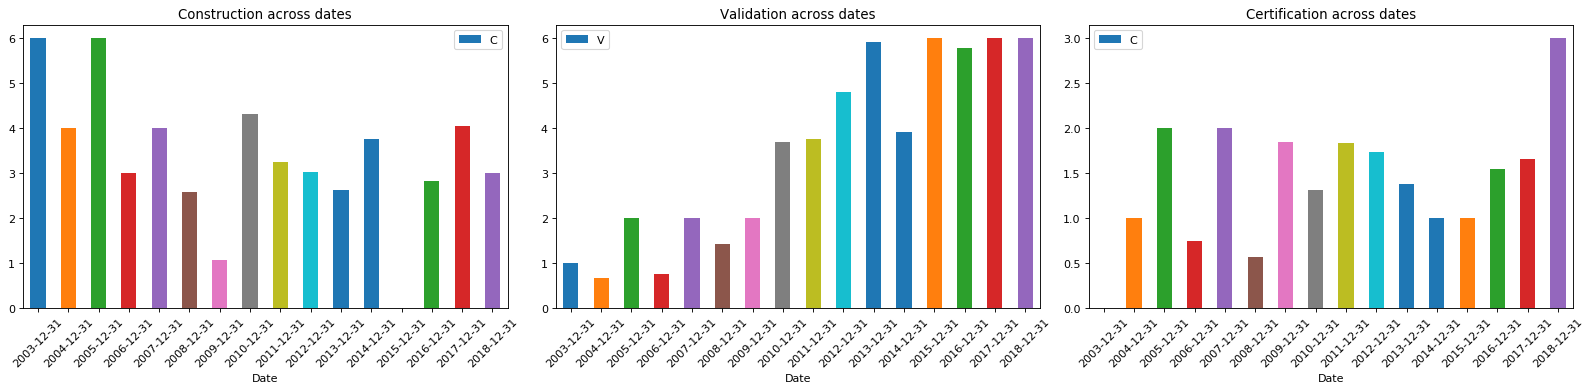

In [8]:
axes = proc_date_data.columns
fig=plt.figure(figsize=(20, 5), dpi= 80, facecolor='w', edgecolor='k')
for i, axis in enumerate(axes):
    plt.subplot(1, len(axes), i + 1)
    pl.primary_plot(proc_date_data, axis, title=axis + ' across dates', rotation_angle=45)
plt.show()

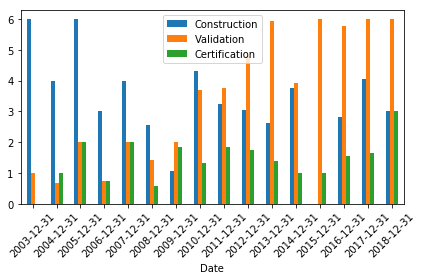

In [9]:
pl.primary_plot(proc_date_data, axes, rotation_angle=45)
plt.show()